In [ ]:
library(arules)

In [5]:
str(Titanic)

 'table' num [1:4, 1:2, 1:2, 1:2] 0 0 35 0 0 0 17 0 118 154 ...
 - attr(*, "dimnames")=List of 4
  ..$ Class   : chr [1:4] "1st" "2nd" "3rd" "Crew"
  ..$ Sex     : chr [1:2] "Male" "Female"
  ..$ Age     : chr [1:2] "Child" "Adult"
  ..$ Survived: chr [1:2] "No" "Yes"


In [9]:
df<-as.data.frame(Titanic)
titanic.raw<-NULL

In [11]:
for (i in (1:4)) {
    titanic.raw<-cbind(titanic.raw,rep(as.character(df[,i]),df$Freq))
}

In [28]:
titanic.raw<-data.frame(titanic.raw)

In [35]:
names(titanic.raw)<-c("Class","Sex","Age","Survived")
str(titanic.raw)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


In [36]:
rules.all<- apriori(titanic.raw)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 220 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [27 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [37]:
inspect(rules.all)

     lhs                                   rhs           support   confidence
[1]  {}                                 => {Age=Adult}   0.9504771 0.9504771 
[2]  {Class=2nd}                        => {Age=Adult}   0.1185825 0.9157895 
[3]  {Class=1st}                        => {Age=Adult}   0.1449341 0.9815385 
[4]  {Sex=Female}                       => {Age=Adult}   0.1930940 0.9042553 
[5]  {Class=3rd}                        => {Age=Adult}   0.2848705 0.8881020 
[6]  {Survived=Yes}                     => {Age=Adult}   0.2971377 0.9198312 
[7]  {Class=Crew}                       => {Sex=Male}    0.3916402 0.9740113 
[8]  {Class=Crew}                       => {Age=Adult}   0.4020900 1.0000000 
[9]  {Survived=No}                      => {Sex=Male}    0.6197183 0.9154362 
[10] {Survived=No}                      => {Age=Adult}   0.6533394 0.9651007 
[11] {Sex=Male}                         => {Age=Adult}   0.7573830 0.9630272 
[12] {Sex=Female,Survived=Yes}          => {Age=Adult}   0.14357

In [38]:
rules<-apriori(titanic.raw,control=list(verbose=F),parameter=list(minlen=2,supp=0.005,conf=0.8),
                     appearance=list(rhs=c("Survived=Yes","Survived=No"),default="lhs"))

In [42]:
quality(rules)<-round(quality(rules),digits=3)
rules.sort<-sort(rules,by="lift")

In [55]:
inspect(rules.sort)

     lhs                                  rhs            support confidence
[1]  {Class=2nd,Age=Child}             => {Survived=Yes} 0.011   1.000     
[2]  {Class=2nd,Sex=Female,Age=Child}  => {Survived=Yes} 0.006   1.000     
[3]  {Class=1st,Sex=Female}            => {Survived=Yes} 0.064   0.972     
[4]  {Class=1st,Sex=Female,Age=Adult}  => {Survived=Yes} 0.064   0.972     
[5]  {Class=2nd,Sex=Female}            => {Survived=Yes} 0.042   0.877     
[6]  {Class=Crew,Sex=Female}           => {Survived=Yes} 0.009   0.870     
[7]  {Class=Crew,Sex=Female,Age=Adult} => {Survived=Yes} 0.009   0.870     
[8]  {Class=2nd,Sex=Female,Age=Adult}  => {Survived=Yes} 0.036   0.860     
[9]  {Class=2nd,Sex=Male,Age=Adult}    => {Survived=No}  0.070   0.917     
[10] {Class=2nd,Sex=Male}              => {Survived=No}  0.070   0.860     
[11] {Class=3rd,Sex=Male,Age=Adult}    => {Survived=No}  0.176   0.838     
[12] {Class=3rd,Sex=Male}              => {Survived=No}  0.192   0.827     
     lift  c

In [61]:
subset.matrix<-is.subset(rules.sort,rules.sort)
subset.matrix[lower.tri(subset.matrix,diag=T)]<- FALSE
redundant<-colSums(subset.matrix,na.rm=T) >= 1
which(redundant)
rules.prune<-rules.sort[!redundant]

{Class=2nd,Sex=Female,Age=Child,Survived=Yes} 
                                             2 
 {Class=1st,Sex=Female,Age=Adult,Survived=Yes} 
                                             4 
{Class=Crew,Sex=Female,Age=Adult,Survived=Yes} 
                                             7 
 {Class=2nd,Sex=Female,Age=Adult,Survived=Yes} 
                                             8

In [62]:
inspect(rules.prune)

    lhs                               rhs            support confidence lift 
[1] {Class=2nd,Age=Child}          => {Survived=Yes} 0.011   1.000      3.096
[2] {Class=1st,Sex=Female}         => {Survived=Yes} 0.064   0.972      3.010
[3] {Class=2nd,Sex=Female}         => {Survived=Yes} 0.042   0.877      2.716
[4] {Class=Crew,Sex=Female}        => {Survived=Yes} 0.009   0.870      2.692
[5] {Class=2nd,Sex=Male,Age=Adult} => {Survived=No}  0.070   0.917      1.354
[6] {Class=2nd,Sex=Male}           => {Survived=No}  0.070   0.860      1.271
[7] {Class=3rd,Sex=Male,Age=Adult} => {Survived=No}  0.176   0.838      1.237
[8] {Class=3rd,Sex=Male}           => {Survived=No}  0.192   0.827      1.222
    count
[1]  24  
[2] 141  
[3]  93  
[4]  20  
[5] 154  
[6] 154  
[7] 387  
[8] 422  


In [73]:
library(arulesViz)

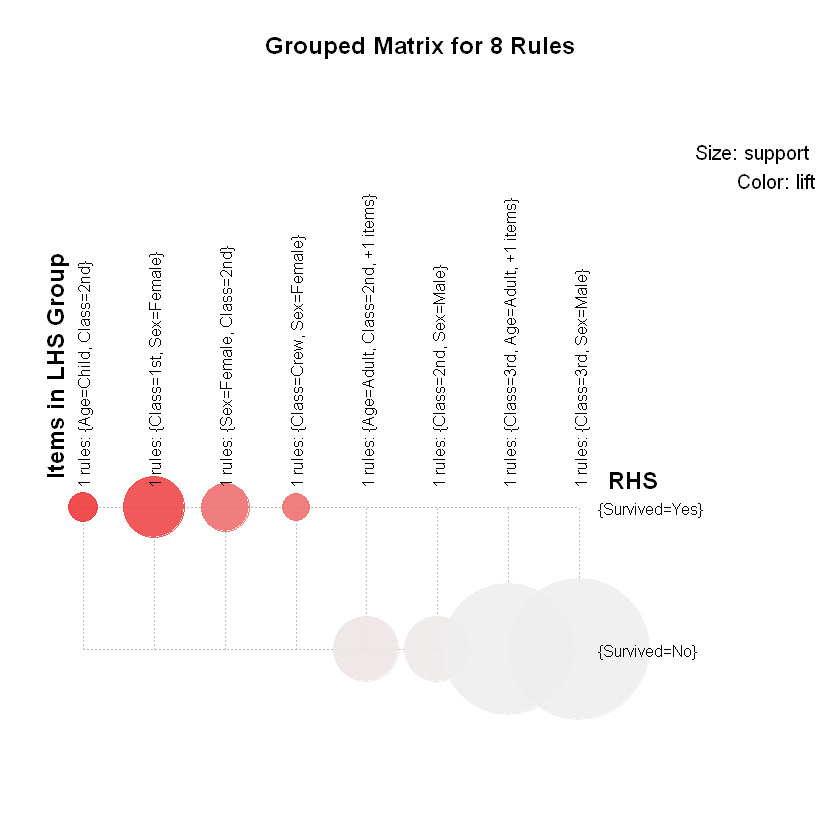

In [74]:
plot(rules.prune,method='grouped')

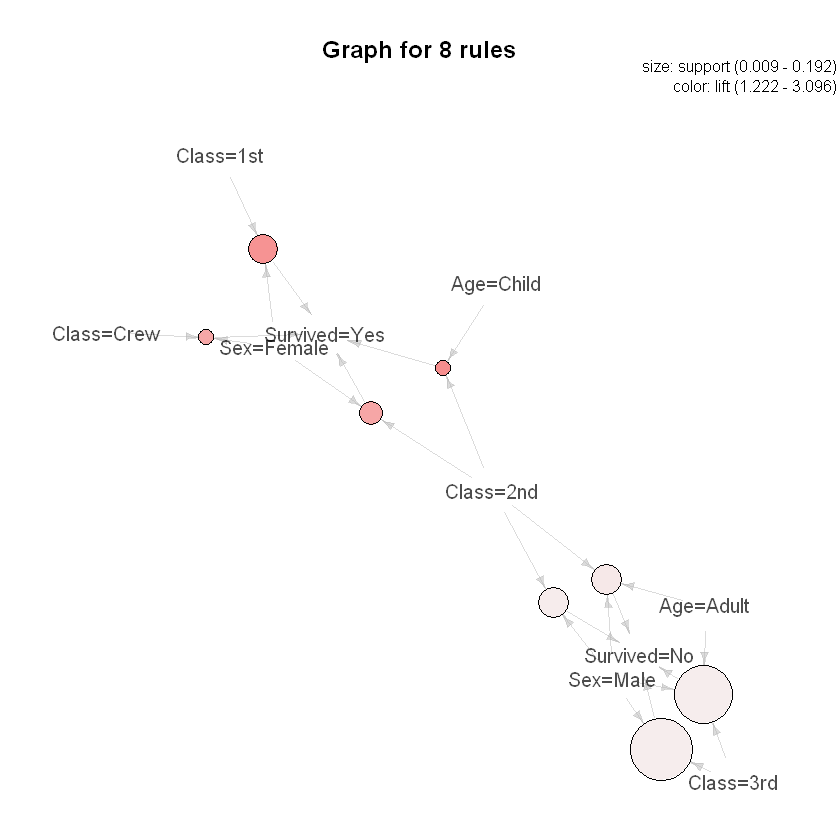

In [78]:
plot(rules.prune,method='graph')